<H1> CURSO DE INTRODUÇÃO A MACHINE LEARNING <H2>
<h2> Preprocessamento de Texto </h2>

In [1]:
%matplotlib inline

In [2]:
#IMPORTS 

#NumPy
import numpy as np

#matplotlib pyplot
import matplotlib.pyplot as plt

#taamnho das figuras
plt.rcParams['figure.figsize'] = (11,5)


<h2> Vamos agora processar dados não estruturados </h2>

In [3]:
import nltk

In [4]:
#nltk.download() uma vez só

In [5]:
doc1 =  "As origens do Mercosul estão ligadas às discussões para a constituição de um mercado \
    econômico regional para a América Latina, que remontam ao tratado que estabeleceu a Associação \
    Latino-Americana de Livre Comércio (ALALC) desde a década de 1960. Esse organismo foi sucedido pela \
    Associação Latino-Americana de Integração (ALADI) na década de 1980. À época, a Argentina e o Brasil \
    fizeram progressos na matéria, assinando a Declaração do Iguaçu (1985),[5] que estabelecia uma comissão \
    bilateral, à qual se seguiram uma série de acordos comerciais no ano seguinte."

In [6]:
doc2 = "Em 6 de julho de 1990, o presidente do Brasil, Fernando Collor, e o da Argentina, Carlos Menem, \
    assinaram a Ata de Buenos Aires.[15] visando à total integração alfandegária entre os dois países. \
    Foi decidido que todas as medidas para a construção da união aduaneira deveriam ser concluídas até \
    31 de dezembro de 1994.[16] Para assegurar o cumprimento dos prazos, foi criado o Grupo de Trabalho \
    Binacional, órgão que teve como responsabilidade, definir métodos para a criação do mercado comum entre \
    as duas nações. Em setembro, os governos de Paraguai e Uruguai demonstraram forte interesse no processo \
    de integração regional, levando à plena percepção dos signatários que um tratado mais abrangente era \
    necessário"

In [7]:
doc3 = 'Perguntado se o entendimento comercial entre os dois blocos comerciais apontava que o Brasil\
    permaneceria no Acordo de Paris durante todo o seu mandato, Bolsonaro disse que - no momento estamos no acordo -\
    e que o Brasil não tem como cumprir todas as metas do Acordo de Paris. Falei com Angela Merkel e a Alemanha\
    não vai cumprir o acordo no tocante a energias fósseis. O que cada brasileiro bota para fora de gás carbônico,\
    o alemão é quatro vezes mais , disse. A nossa (meta), né? A gente não tem como cumprir, nem que pegue aqui\
    agora 100 mil homens no campo e comece a reflorestar a partir de agora, até 2030 não vai atingir essa meta,\
    emendou.. '

In [8]:
#tokenizando
tokens1 = [t for t in doc1.split()]
tokens2 = [t for t in doc2.split()]
tokens3 = [t for t in doc2.split()]

In [9]:
for i in tokens1: print(i,end=" ,")

As ,origens ,do ,Mercosul ,estão ,ligadas ,às ,discussões ,para ,a ,constituição ,de ,um ,mercado ,econômico ,regional ,para ,a ,América ,Latina, ,que ,remontam ,ao ,tratado ,que ,estabeleceu ,a ,Associação ,Latino-Americana ,de ,Livre ,Comércio ,(ALALC) ,desde ,a ,década ,de ,1960. ,Esse ,organismo ,foi ,sucedido ,pela ,Associação ,Latino-Americana ,de ,Integração ,(ALADI) ,na ,década ,de ,1980. ,À ,época, ,a ,Argentina ,e ,o ,Brasil ,fizeram ,progressos ,na ,matéria, ,assinando ,a ,Declaração ,do ,Iguaçu ,(1985),[5] ,que ,estabelecia ,uma ,comissão ,bilateral, ,à ,qual ,se ,seguiram ,uma ,série ,de ,acordos ,comerciais ,no ,ano ,seguinte. ,

In [10]:
freq = nltk.FreqDist(tokens1)

In [11]:
freq

FreqDist({'a': 6, 'de': 6, 'que': 3, 'do': 2, 'para': 2, 'Associação': 2, 'Latino-Americana': 2, 'década': 2, 'na': 2, 'uma': 2, ...})

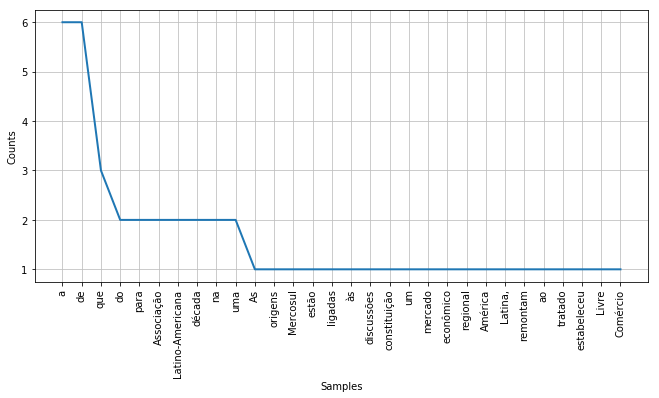

In [12]:
freq.plot(30, cumulative=False)

In [13]:
def diversidadeLexica(text):
    return len(set(text)) / len(text)

In [14]:
diversidadeLexica(doc1)

0.08404802744425385

In [15]:
# word tokenize
from nltk.tokenize import word_tokenize
print(word_tokenize(doc1,"portuguese"))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  Attempted to load [93mtokenizers/punkt/portuguese.pickle[0m

  Searched in:
    - 'C:\\Users\\ronal/nltk_data'
    - 'C:\\Users\\ronal\\Anaconda3\\nltk_data'
    - 'C:\\Users\\ronal\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\ronal\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ronal\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
from nltk.tokenize import sent_tokenize #separa os períodos
print(sent_tokenize(doc1,"portuguese"))

In [ ]:
#parece que o word tokenize é o mais útil
tokens1 = word_tokenize(doc1,"portuguese")

In [ ]:
def remover(tokens, listaRemocao):
    for r in listaRemocao:
        while True:
            try:
                p = tokens.index(r)
                del tokens[p]
            except(Exception):
                break
    return tokens

In [ ]:
# função de remoção
def remover2(tokens, listaRemocao):
    for r in listaRemocao:
        i=0
        length = len(tokens)  
        while(i<length):
            if(tokens[i]==r):
                tokens.remove(tokens[i])
                length = length -1  
                continue
            i = i+1
    return tokens
    

In [ ]:
# remoção de artigos e sinais ortográficos

#removendo caracteres especiais 
listaRemover = ".,;!?[]{}()_\/\\\'\`\"\``\ "
tokens1 = remover(tokens1,listaRemover)

In [ ]:
for i in tokens1:print(i,end=" ,")

In [ ]:
# removendo digitos
def removeDigitos(tokens):
    i=0
    length = len(tokens)  
    while(i<length):
        if tokens[i].isdigit():
            tokens.remove(tokens[i])
            length = length -1  
            continue
        i = i+1
    return tokens

In [ ]:
tokens1 = removeDigitos(tokens1)

In [ ]:
for i in tokens1:print(i,end=" ,")

In [ ]:
# remoções manuais remanescentes - muito raro não ter que fazê-las
manuais = ['1980.','(1985),[5]','1960.','As','a','às','à','Às','o','à','À']
tokens1 = remover(tokens1,manuais)

In [ ]:
for i in tokens1:print(i,end=" ,")

<h2> STOP WORDS </h2>

In [ ]:
from nltk.corpus import stopwords
 
stopwords.words('portuguese')[:10]


In [ ]:
#remover stop words
stp = stopwords.words('portuguese')
tokens1 = remover(tokens1,stp)

In [ ]:
for i in tokens1:print(i,end=" ,")

<h1> STEMMING </h1>

In [ ]:
from nltk.stem import PorterStemmer
 
stemmer = PorterStemmer()
 
print(stemmer.stem('working'))

In [ ]:
from nltk.stem import SnowballStemmer
 
print(SnowballStemmer.languages)


In [ ]:

 
stemerBrasileiro = SnowballStemmer('portuguese')
print(stemerBrasileiro.stem("apatrida"))
print(stemerBrasileiro.stem("cadeirante"))
print(stemerBrasileiro.stem("inconstitucionalissimamente"))


<h2> Projeto snowball precisa melhorar, mas pode ser usado assim mesmo </h2>

In [ ]:
#vamos la
def reducaoRadical(tokens):
    return [stemerBrasileiro.stem(i) for i in tokens]

In [ ]:
tokens1 = reducaoRadical(tokens1)

In [ ]:
for i in tokens1:print(i,end=" ,")

<h2> Repetindo o processo para doc2 e doc3 </h2>

In [ ]:
listaRemover = "-.,;!?[]{}()_\/\\\'\`\"\``\ ``"
manuais = ['1980.','(1985),[5]','1960.','As','a','às','à','Às','o','à','À','2030','100']
stp = stopwords.words('portuguese')
tokens2 = reducaoRadical(
    removeDigitos(remover(remover(remover(word_tokenize(doc2,"portuguese"),listaRemover),manuais),stp)))
tokens3 = reducaoRadical(
    removeDigitos(remover(remover(remover(word_tokenize(doc3,"portuguese"),listaRemover),manuais),stp)))

In [ ]:
for i in tokens2:print(i, end = " ,")

In [ ]:
for i in tokens3:print(i, end = ", ")

<h2> Agora vamos vetorizar </h2>

In [ ]:
listaTermos = list(set(tokens1+tokens2+tokens3))

In [ ]:
for i in listaTermos:print(i, end = ", ")

In [ ]:
f1 = nltk.FreqDist(tokens1)
f2 = nltk.FreqDist(tokens2)
f3 = nltk.FreqDist(tokens3)

In [ ]:
f1['alad']

In [ ]:
# criando um dataset de frequencias
def criaDatasetFreq(listaTokens):
    #frequencias
    freqs = []
    for i in listaTokens:
        f = nltk.FreqDist(i)
        freqs.append(f)
    #termos
    termos = []
    for i in listaTokens: termos += i
    termos = list(set(termos))
    
    #dataset
    datasetF = []
    
    for i,t in enumerate(listaTokens):
        l = []
        for j in termos:
            l.append(freqs[i][j])
        datasetF.append(l)
    return datasetF,termos

In [ ]:
dsf,termos = criaDatasetFreq([tokens1,tokens2,tokens3])

In [ ]:
print("DOC\TERMO",end=" :")
for i in termos[:10]:print(i,end=", ")
print()
for i,d in enumerate(dsf):
    print("DOC {}   ".format(i),end=" : ")
    print(d[:10])

In [ ]:
# criando um dataset binario
# criando um dataset binario
def criaDatasetBinario(listaTokens):
    #frequencias
    freqs = []
    for i in listaTokens:
        f = nltk.FreqDist(i)
        freqs.append(f)
    #termos
    termos = []
    for i in listaTokens: termos += i
    termos = list(set(termos))
    
    #dataset
    datasetB = []
    
    for i,t in enumerate(listaTokens):
        l = []
        for j in termos:
            if freqs[i][j] > 0:
                l.append(1)
            else:
                l.append(0)
        datasetB.append(l)
    return datasetB,termos

In [ ]:
dsf,termos = criaDatasetBinario([tokens1,tokens2,tokens3])

In [ ]:
print("DOC\TERMO",end=" :")
for i in termos[:10]:print(i,end=", ")
print()
for i,d in enumerate(dsf):
    print("DOC {}   ".format(i),end=" : ")
    print(d[:10])

<h2> Dataset com tf-idf </h2>

In [ ]:
from nltk.text import TextCollection
corpus = TextCollection([tokens1,tokens2,tokens3])

In [ ]:
corpus.tf("comercial",tokens3)

In [ ]:
corpus.idf("comercial")

In [ ]:
#Vetorizando tf-idf usando o sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vetorizador = TfidfVectorizer()
datasetTFIDF = vetorizador.fit_transform([str(tokens1),str(tokens2),str(tokens3)])

In [ ]:
vetorizador.get_feature_names()

In [ ]:
list(datasetTFIDF)

In [ ]:
list(datasetTFIDF[0].todense())

In [ ]:
list(datasetTFIDF[1].todense())

In [ ]:
list(datasetTFIDF[2].todense())

<h1> Próximo passo: Classificação do Texto </h1>

<h1> Enjoy </h1>